In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# from sklearn.xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [2]:
#读取文件
data = pd.read_csv('gcc.csv')
# data1 = data['emd_lable2']
X3 = data

In [3]:
X3.groupby(X3['emd_lable2']).size()

emd_lable2
0.0    21957
1.0    21957
dtype: int64

In [4]:
X3

,Unnamed: 0,pax_tax,pax_fcny,avg_dist_cnt_y3,seg_flight,tkt_3y_amt,dist_cnt_y3,seat_walkway_cnt_y3,emd_lable2
0,0,0.000809,0.000596,0.000000,0.3750,0.001236,0.000000,0.000000,0.0
1,1,0.000344,0.000392,0.347172,0.3750,0.001236,0.000000,0.000000,0.0
2,2,0.000417,0.000057,0.000000,0.5625,0.001236,0.000000,0.000000,0.0
3,3,0.000629,0.000319,0.754508,0.5625,0.007383,0.030705,0.006993,0.0
4,4,0.000393,0.000158,0.000000,0.6250,0.007466,0.040664,0.017483,1.0
...,...,...,...,...,...,...,...,...,...
43909,43909,0.000415,0.000098,0.411954,0.6250,0.001236,0.000000,0.000000,1.0
43910,43910,0.000628,0.000166,0.700813,0.6250,0.008580,0.057040,0.006993,1.0
43911,43911,0.000365,0.000040,0.000000,0.5000,0.001236,0.000000,0.000000,1.0
43912,43912,0.000629,0.000178,0.000000,0.3750,0.008580,0.075018,0.006993,1.0


In [5]:
X3.drop(['pax_name'],axis=1,inplace=True)

In [6]:
X3

,mdl_mcv,dist_all_cnt_y3,dist_all_cnt_y2,dist_i_cnt_y3,dist_i_cnt_y2,avg_dist_cnt_y3,dist_cnt_y3,pref_month_y3_1,emd_lable2
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.166667,0.000000,0.000000,0.000000,0.000000,0.347172,0.000000,0.166667,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.166667,0.030705,0.000000,0.030705,0.000000,0.754508,0.030705,0.625000,0
4,0.000000,0.040664,0.053711,0.040664,0.053419,0.000000,0.040664,0.000000,1
...,...,...,...,...,...,...,...,...,...
23427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
23428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
23429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
23430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [5]:
# 训练集矩阵
# array = X3.values

Y = X3.pop('emd_lable2')
X = X3.values

In [6]:
X

array([[0.00000000e+00, 8.09123633e-04, 5.95642896e-04, ...,
        1.23579143e-03, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.44455213e-04, 3.91623479e-04, ...,
        1.23579143e-03, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 4.17153537e-04, 5.69847337e-05, ...,
        1.23579143e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.39110000e+04, 3.64709954e-04, 3.98658631e-05, ...,
        1.23579143e-03, 0.00000000e+00, 0.00000000e+00],
       [4.39120000e+04, 6.29281462e-04, 1.78223859e-04, ...,
        8.58004898e-03, 7.50180618e-02, 6.99300699e-03],
       [4.39130000e+04, 3.17333518e-04, 3.15409329e-04, ...,
        1.23579143e-03, 0.00000000e+00, 0.00000000e+00]])

In [7]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
43909    1.0
43910    1.0
43911    1.0
43912    1.0
43913    1.0
Name: emd_lable2, Length: 43914, dtype: float64

In [8]:
folds = 10
seed = 7
kfold = KFold(n_splits=folds,random_state=seed)
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['SVM'] = SVC()
models['NB'] = GaussianNB()
models['XGboost'] = XGBClassifier()
results = []

G:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [9]:
for name in models:
    result = cross_val_score(models[name], X , Y, cv=kfold)
    results.append(result)
    msg = '%s:%.3f(%.3f)'%(name,result.mean(),result.std())
    print(msg)

LR:0.769(0.362)
LDA:0.930(0.078)
KNN:0.950(0.054)
CART:0.923(0.067)
SVM:0.940(0.079)
NB:0.887(0.164)


G:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:15:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

G:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 36739 missing from c

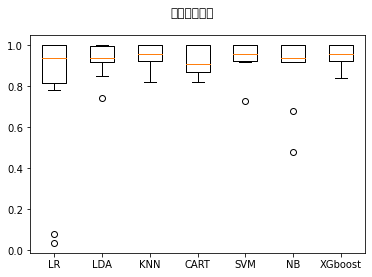

In [10]:
fig = pyplot.figure()
fig.suptitle('算法模型比较')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()